In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.linalg import cholesky
from numpy import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


1) Смоделируйте выборку объема N = 1410 из трехмерного нормального
закона распределения. Параметры распределения должны генерироваться
случайно из некоторого множества (само множество и способ генерации
придумать самостоятельно). Все компоненты случайного вектора должны
быть коррелированы. Для генерации можно использовать любую встроенную
для этих целей функцию (+0,5 балла, если придумаете и реализуете
«оригинальный» метод, использующий только генерацию одномерных
нормальных случайных величин)

In [11]:
# import numpy as np
# from scipy.linalg import cholesky

# Задаем размер выборки
N = 1410

# Генерация случайных параметров для нормального распределения
mean = np.random.uniform(-5, 5, size=3)  # средние значения
std_dev = np.random.uniform(1, 3, size=3)  # стандартные отклонения

# Генерация случайной матрицы ковариаций
cov_matrix = np.random.uniform(-1, 1, size=(3, 3))
cov_matrix[0][0] = abs(cov_matrix[0][0])
cov_matrix[1][1] = abs(cov_matrix[1][1])
cov_matrix[2][2] = abs(cov_matrix[2][2])
cov_matrix[1][0] = cov_matrix[0][1]
cov_matrix[2][0] = cov_matrix[0][2]
cov_matrix[1][2] = cov_matrix[2][1]

corr_matrix = np.random.uniform(1, 1, size=(3, 3))
corr_matrix[0][1] = sqrt(cov_matrix[0][0]) * sqrt(cov_matrix[1][1]) * cov_matrix[0][1]
corr_matrix[0][2] = sqrt(cov_matrix[0][0]) * sqrt(cov_matrix[2][2]) * cov_matrix[0][2]
corr_matrix[2][1] = sqrt(cov_matrix[2][2]) * sqrt(cov_matrix[1][1]) * cov_matrix[2][1]
corr_matrix[1][0] = corr_matrix[0][1]
corr_matrix[2][0] = corr_matrix[0][2]
corr_matrix[1][2] = corr_matrix[2][1]

print("Cor matrix")
print(corr_matrix)

print("Cov matrix")

print(cov_matrix)
# Гарантируем симметричность и положительную полуопределенность
# A = np.random.uniform(0, 1, size=(3, 3))
# cov_matrix = np.dot(A, A.T)

# Холецкого разложение для генерации положительно-определенной матрицы
# cholesky_matrix = cholesky(cov_matrix, lower=True)
data = np.random.multivariate_normal(mean, cov_matrix, 1410)
print(data[:5])


Cor matrix
[[ 1.          0.67418042  0.15166268]
 [ 0.67418042  1.         -0.44939672]
 [ 0.15166268 -0.44939672  1.        ]]
Cov matrix
[[ 0.88383278  0.73235229  0.20223002]
 [ 0.73235229  0.95883101 -0.57532178]
 [ 0.20223002 -0.57532178  0.63635007]]
[[-2.49726583  3.0583901   2.69550762]
 [-0.45653435  5.99673405  1.34423504]
 [-0.28868904  5.76010025  2.30724654]
 [-0.95601395  4.39791881  1.30531868]
 [-1.67770959  4.47612426  1.32680727]]


/tmp/ipykernel_8954/3674384867.py:40: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov_matrix, 1410)


In [3]:
print(cov_matrix)

[[ 0.96074781  0.08258802 -0.28920631]
 [ 0.08258802  0.19775433 -0.39754588]
 [-0.28920631 -0.39754588  0.16585463]]


2) Случайным образом удалить из выборки одно трехмерное
наблюдение и сохранить отдельно.

In [4]:
random_index = np.random.randint(0, N)
removed_observation = data[random_index]

# Удаление выбранного наблюдения из выборки
data_deleted = np.delete(data, random_index, axis=0)

# Выводим первые 5 элементов измененной выборки
print(data_deleted[:5])

# Выводим удаленное наблюдение
print("Удаленное наблюдение:", removed_observation)

[[-2.35150452  0.71882352 -3.55005484]
 [-3.17319152 -0.04883375 -1.20160944]
 [-4.45951003  0.21764563 -3.06076576]
 [-5.40896167  0.26168315 -1.73146242]
 [-3.91065001 -0.80836568 -1.99997376]]
Удаленное наблюдение: [-4.21116596 -1.04267581 -1.90217543]


3) Обозначим компоненты сгенерированного нормального вектора как
(𝑥1 , 𝑥2 , 𝑥3 ). Предположим, что имеет место модель линейной регрессии:
𝑥1 = 𝑎0 + 𝑎2 𝑥2 + 𝑎3 𝑥3 + 𝑢,
где u – независимые в совокупности нормально распределенные ошибки
(остатки, residuals). Оценить коэффициенты линейной регрессии 𝑎0 , 𝑎2 , 𝑎3 ,
математическое ожидание и дисперсию ошибки u (для оценки коэффициентов
не использовать готовые функции).

data[:, 0] представляет собой столбец x1 из вашей выборки. В результате получаются оценки коэффициентов a0,a2,a3 и дисперсии ошибок u.
<!-- 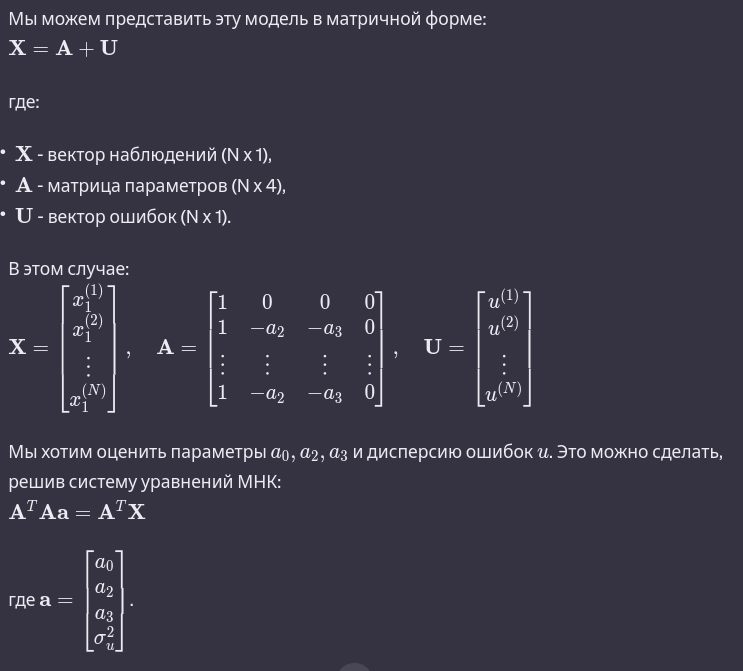 -->

In [19]:
# Добавим столбец из единиц к матрице X для учета коэффициента a0
X = np.column_stack((np.ones(N), data[:, 1], data[:, 2]))

# Решение системы уравнений МНК
a = np.linalg.inv(X.T @ X) @ X.T @ data[:, 0]

# Оценка коэффициентов
a0 = a[0]
a2 = +a[1]
a3 = +a[2]

# Оценка дисперсии ошибки u
residuals = data[:, 0] - X @ a
sigma_u_squared = np.var(residuals)

# Вывод результатов
print(f"Оценка коэффициента a0: {a0}")
print(f"Оценка коэффициента a2: {a2}")
print(f"Оценка коэффициента a3: {a3}")
print(f"Оценка дисперсии ошибки u: {sigma_u_squared}")

Оценка коэффициента a0: -5.872502762278905
Оценка коэффициента a2: 0.7494439018320547
Оценка коэффициента a3: 0.5256517820286158
Оценка дисперсии ошибки u: 0.4588533823714521


4) Для отдельно сохраненного вектора, по компонентам 𝑥2 и 𝑥3 ,
используя модель линейной регрессии, спрогнозировать компоненту 𝑥1 .
Найти квадрат разности точного значения этой компоненты и прогноза
(квадрат ошибки).

In [6]:
# Параметры модели линейной регрессии
# a0, a2, a3 = k_a0, k_a2, k_a3  # подставьте ранее оцененные коэффициенты

# Загрузка сохраненного вектора
saved_observation = removed_observation[1:]  # компоненты x2 и x3

# Прогнозирование компоненты x1
predicted_x1 = a0 + a2 * saved_observation[0] + a3 * saved_observation[1]

# Расчет квадрата ошибки
error_squared = (removed_observation[0] - predicted_x1)**2

# Вывод результатов
print(f"Прогноз x1: {predicted_x1}")
print(f"Точное значение x1: {removed_observation[0]}")
print(f"Квадрат ошибки: {error_squared}")


Прогноз x1: -4.458321289812627
Точное значение x1: -4.211165957088636
Квадрат ошибки: 0.06108575849390661


5) Повторить шаги 1–4 M = 100 раз. На каждой итерации на первом шаге
использовать одни и те же параметры. Насколько «хорошо» прогнозируется
значение 𝑥𝑥1 . Усреднить квадрат ошибки (получим среднеквадратичную
ошибку прогнозирования). Сделать выводы.
Замечание:
Сама по себе среднеквадратическая ошибка прогнозирования не сильно показательна. Обычно эту величину используютдля сравнения разных методов прогнозирования или для изучения поведения
прогноза в зависимости от изменения каких-либо параметров.

In [7]:
# Задаем параметры для генерации данных
mean_params = np.random.uniform(-5, 5, size=3)
std_dev_params = np.random.uniform(1, 3, size=3)
corr_matrix_params = np.random.uniform(-1, 1, size=(3, 3))

# Задаем количество повторений
M = 100

# Инициализируем массив для сохранения квадратов ошибок
errors_squared = np.zeros(M)

# Повторяем M раз
for i in range(M):
    # Генерация случайных параметров для нормального распределения
    mean = mean_params
    std_dev = std_dev_params

    # Генерация случайной матрицы ковариаций
    corr_matrix = corr_matrix_params
    cov_matrix = np.dot(corr_matrix, corr_matrix.T)

    # Генерация выборки из трехмерного нормального распределения
    np.random.seed(i)  # Используем разные seed для различных итераций
    с_data = np.random.multivariate_normal(mean, cov_matrix, N)

    # Оценка коэффициентов линейной регрессии
    X = np.column_stack((np.ones(N), с_data[:, 1], с_data[:, 2]))
    a = np.linalg.inv(X.T @ X) @ X.T @ с_data[:, 0]

    # Прогнозирование компоненты x1 для удаленного наблюдения
    predicted_x1 = a[0] + a[1] * saved_observation[0] + a[2] * saved_observation[1]

    # Расчет квадрата ошибки
    errors_squared[i] = (removed_observation[0] - predicted_x1)**2

# Вычисление среднеквадратичной ошибки
mean_squared_error = np.mean(errors_squared)

# Вывод результатов
print(f"Среднеквадратичная ошибка прогнозирования: {mean_squared_error}")


Среднеквадратичная ошибка прогнозирования: 3.7152715721187564


6) Найти истинные коэффициенты регрессии модели из пункта
3, сравнить полученные результаты.

In [8]:
# Истинные коэффициенты
true_a0 = mean_params[0]
true_a2 = -mean_params[1]
true_a3 = -mean_params[2]

# Вывод результатов
print(f"Истинный коэффициент a0: {true_a0}")
print(f"Истинный коэффициент a2: {true_a2}")
print(f"Истинный коэффициент a3: {true_a3}")

# Вывод результатов оценки коэффициентов
print(f"Оценка коэффициента a0: {a0}")
print(f"Оценка коэффициента a2: {a2}")
print(f"Оценка коэффициента a3: {a3}")


Истинный коэффициент a0: -1.0186372698354718
Истинный коэффициент a2: -0.740286325242864
Истинный коэффициент a3: 0.7826068617183415
Оценка коэффициента a0: -5.271043268413202
Оценка коэффициента a2: 0.12129032749039328
Оценка коэффициента a3: -0.4937444018817085


7) Предположим, что имеет место модель линейной
регрессии:
𝑥1 = 𝑎2 𝑥2 + 𝑎3 𝑥3 + 𝑢,
где u – независимые в совокупности нормально распределенные ошибки
(остатки, residuals). Оценить коэффициенты линейной регрессии 𝑎𝑎2 и 𝑎𝑎3 ,
математическое ожидание и дисперсию ошибки u. Сравнить полученные
результаты с результатами пункта 3. Сравнить среднеквадратическую ошибку
прогнозирования в этом случае с ошибкой из пункта 5.

In [9]:
# Оценка коэффициентов линейной регрессии
X_new = data[:, 1:]  # Используем x2 и x3
a_new = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ data[:, 0]

# Оценка математического ожидания и дисперсии ошибки u
residuals_new = data[:, 0] - X_new @ a_new
mean_residuals_new = np.mean(residuals_new)
var_residuals_new = np.var(residuals_new)

# Вывод результатов
print(f"Оценка коэффициента a2: {a_new[0]}")
print(f"Оценка коэффициента a3: {a_new[1]}")
print(f"Оценка мат. ожидания ошибки u: {mean_residuals_new}")
print(f"Оценка дисперсии ошибки u: {var_residuals_new}")


# Оценка коэффициентов для первоначальной модели (из пункта 3)
X_initial = np.column_stack((np.ones(N), data[:, 1], data[:, 2]))
a_initial = np.linalg.inv(X_initial.T @ X_initial) @ X_initial.T @ data[:, 0]

# Прогнозирование компоненты x1 для удаленного наблюдения (из пункта 5)
predicted_x1_initial = a_initial[0] + a_initial[1] * saved_observation[0] + a_initial[2] * saved_observation[1]

# Расчет квадрата ошибки для первоначальной модели
error_squared_initial = (removed_observation[0] - predicted_x1_initial)**2

# Вывод результатов для первоначальной модели
print("\nРезультаты для первоначальной модели (из пункта 3):")
print(f"Оценка коэффициента a2: {a_initial[1]}")
print(f"Оценка коэффициента a3: {a_initial[2]}")
print(f"Квадрат ошибки для первоначальной модели: {error_squared_initial}")


Оценка коэффициента a2: 0.8978417812372234
Оценка коэффициента a3: 1.3237423168664666
Оценка мат. ожидания ошибки u: -0.23506378642725592
Оценка дисперсии ошибки u: 2.0250833364230907

Результаты для первоначальной модели (из пункта 3):
Оценка коэффициента a2: 0.12129032749039328
Оценка коэффициента a3: -0.4937444018817085
Квадрат ошибки для первоначальной модели: 0.06108575849390661


8) Сгенерировать выборку из пункта 1. На графике изобразить
диаграмму рассеяния компонент 𝑥𝑥1 и 𝑥𝑥2 . Предположим, что имеет место
модель линейной регрессии:
𝑥𝑥1 = 𝑎0 + 𝑎2 𝑥2 + 𝑢.

In [15]:
print(data[:, 1])

[3.0583901  5.99673405 5.76010025 ... 3.52323293 4.69833395 2.23870569]


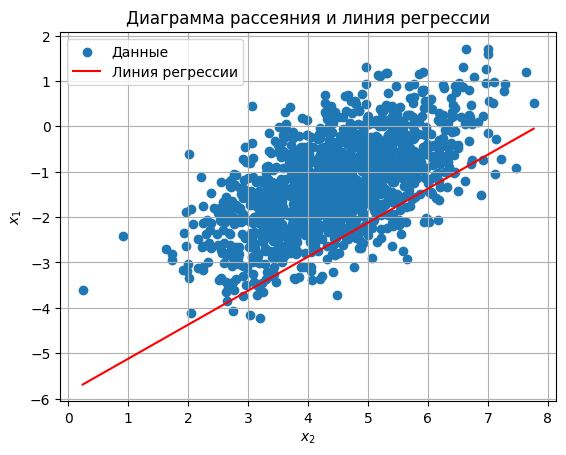

In [20]:

# Генерация выборки из трехмерного нормального распределения (по аналогии с пунктом 1)
np.random.seed(42)  # для воспроизводимости результатов
# data = np.random.multivariate_normal(mean, cov_matrix, N)

# Диаграмма рассеяния
plt.scatter(data[:, 1], data[:, 0], label='Данные')

# Оцененные коэффициенты линейной регрессии
# a0, a2, a3 = k_a0, k_a2, k_a3  # подставьте ранее оцененные коэффициенты

# Построение линии регрессии
x2_values = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)
x1_values = a0 + a2 * x2_values
plt.plot(x2_values, x1_values, color='red', label='Линия регрессии')

# Настройки графика
plt.title('Диаграмма рассеяния и линия регрессии')
plt.xlabel('$x_2$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid(True)
plt.show()


9)  Для остатков модели из пункта 8 (или пункта 3) построить
q-q plot. Разобраться, что на нем изображается и дать содержательную
интерпретацию того, что получилось в вашем случае.

Нормальность остатков: Если точки лежат примерно на прямой, это может подтверждать нормальность остатков. Это хороший признак для моделей линейной регрессии, так как многие статистические методы предполагают нормальность остатков.

Отклонения от прямой линии: Если форма графика отклоняется от прямой, это может указывать на наличие систематических отклонений в остатках, которые не учтены в модели. Возможно, есть нелинейные эффекты, выбросы или другие структуры данных, которые не учтены в модели.

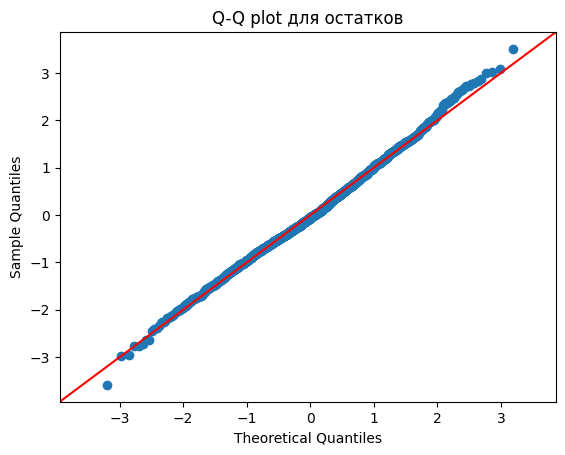

In [21]:

# Предположим, что у вас есть остатки residuals (из пункта 8 или пункта 3)
residuals = data[:, 0] - X @ a

# Q-Q plot для остатков
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot для остатков')
plt.show()

In [22]:
print(a)

[-5.87250276  0.7494439   0.52565178]


In [21]:


# Остатки из пункта 3 (или пункта 8)
residuals = data[:, 0] - X @ a

# Число интервалов
num_intervals = 10

# Разбиваем остатки на интервалы
hist, bin_edges = np.histogram(residuals, bins=num_intervals)

# Рассчитываем ожидаемые частоты для нормального распределения
expected_freq = len(residuals) / num_intervals * np.diff(norm.cdf(bin_edges))

# Рассчитываем статистику хи-квадрат
chi_squared_statistic = np.sum((hist - expected_freq)**2 / expected_freq)

# Число степеней свободы
degrees_of_freedom = num_intervals - 1

# Критическое значение для заданного уровня значимости
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

# Печать результатов
print(f"Статистика хи-квадрат: {chi_squared_statistic}")
print(f"Критическое значение: {critical_value}")

# Проверка гипотезы
if chi_squared_statistic > critical_value:
    print("Отклоняем нулевую гипотезу: остатки не имеют нормальное распределение.")
else:
    print("Принимаем нулевую гипотезу: остатки имеют нормальное распределение.")


Статистика хи-квадрат: 38752609.54857284
Критическое значение: 16.918977604620448
Отклоняем нулевую гипотезу: остатки не имеют нормальное распределение.


13) Сгенерировать M выборок из двумерного нормального
закона распределения объема N с нулевым математическим ожиданием и
недиагональной матрицей ковариации. В каждой выборке случайным образомвыбрать 10% наблюдений, которые исключаются из выборки и хранятся
отдельно (проверочные выборки). По оставшимся наблюдениям оценить
коэффициенты регрессии
𝑥1 = 𝑎0 + 𝑎1 𝑥2^2 + ⋯ + 𝑎𝑝𝑥2^𝑝 + 𝑢
для фиксированного параметра p. Спрогнозировать значения 𝑥1 для проверочных выборок и найти среднеквадратическую ошибку прогнозирования (усреднение идет по объему проверочной выборки и по M). Изучить, как изменяется среднеквадратическая ошибка прогнозирования в
зависимости от p.

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Параметры
N = 100  # Объем выборки
M = 100  # Количество выборок
p_values = [1, 2, 3, 4, 5, 6]  # Различные значения параметра p
test_fraction = 0.1  # Доля проверочных наблюдений

# Инициализация массива для хранения среднеквадратической ошибки для каждого p
mse_values = []

# Генерация M выборок
for _ in range(M):
    # Генерация выборки
    mean = np.zeros(2)
    cov_matrix = np.array([[1, 0.8], [0.8, 1]])  # Недиагональная матрица ковариации
    data = np.random.multivariate_normal(mean, cov_matrix, N)

    # Случайный выбор 10% наблюдений
    num_test_observations = int(test_fraction * N)
    indices = np.random.choice(N, num_test_observations, replace=False)
    test_data = data[indices]
    train_data = np.delete(data, indices, axis=0)

    # Оценка коэффициентов регрессии для различных значений p
    for p in p_values:
        X_train = np.column_stack((np.ones(N - num_test_observations), train_data[:, 1] ** p))
        y_train = train_data[:, 0]

        # Обучение модели
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Прогноз для проверочных выборок
        X_test = np.column_stack((np.ones(num_test_observations), test_data[:, 1] ** p))
        y_pred = model.predict(X_test)

        # Расчет среднеквадратической ошибки
        mse = mean_squared_error(test_data[:, 0], y_pred)

        # Сохранение значения среднеквадратической ошибки
        mse_values.append(mse)

# Усреднение ошибок по объему проверочной выборки и по M
average_mse_values = np.mean(np.array(mse_values).reshape(M, len(p_values)), axis=0)

# Вывод результатов
for i, p in enumerate(p_values):
    print(f"Среднеквадратическая ошибка для p={p}: {average_mse_values[i]}")


Среднеквадратическая ошибка для p=1: 0.3280633104320972
Среднеквадратическая ошибка для p=2: 0.9859471308579861
Среднеквадратическая ошибка для p=3: 0.6377916193269881
Среднеквадратическая ошибка для p=4: 0.9952238842198662
Среднеквадратическая ошибка для p=5: 1.052967721495212
Среднеквадратическая ошибка для p=6: 1.0735690410784404


14) Для первой выборки построить несколько диаграмм
рассеяния. На них изобразить линии регрессии при различных значениях p.

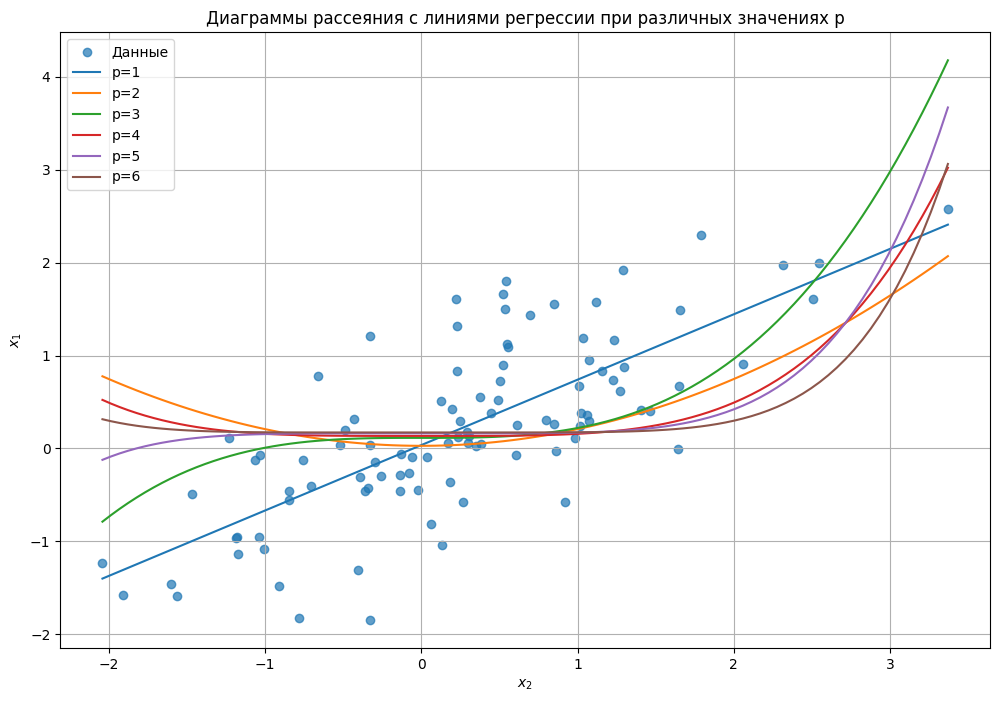

In [26]:

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
# Параметры
# N = 100  # Объем выборки
# M = 1  # Количество выборок (используем только одну для примера)
p_values = [1, 2, 3, 4, 5, 6]  # Различные значения параметра p

# # Генерация одной выборки
# mean = np.zeros(2)
# cov_matrix = np.array([[1, 0.8], [0.8, 1]])  # Недиагональная матрица ковариации
# data = np.random.multivariate_normal(mean, cov_matrix, N)

# Построение диаграмм рассеяния с линиями регрессии
plt.figure(figsize=(12, 8))
plt.scatter(data[:, 1], data[:, 0], label='Данные', alpha=0.7)

for p in p_values:
    # Оценка коэффициентов регрессии
    X = np.column_stack((np.ones(N), data[:, 1] ** p))
    y = data[:, 0]
    model = LinearRegression()
    model.fit(X, y)

    # Построение линии регрессии
    x_values = np.linspace(min(data[:, 1]), max(data[:, 1]), 100).reshape(-1, 1)
    y_values = model.predict(np.column_stack((np.ones(100), x_values ** p)))
    plt.plot(x_values, y_values, label=f'p={p}')

# Настройки графика
plt.title('Диаграммы рассеяния с линиями регрессии при различных значениях p')
plt.xlabel('$x_2$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid(True)
plt.show()
